#  **Random Forest**
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. 

**Project made by Cureu Denisa**

# ***Understanding Random Forests***
* For classification tasks, the output of the random forest is the class selected by most trees.

 ***Import libraries***

In [ ]:
import pandas as pd #using Pandas to read the data
import numpy as np  #using Numpy for the great utility methods
import seaborn as sns #using Seaborn to visualize the data
import matplotlib.pyplot as plt #using Matplotlib to visualize the data


 ***Import database***

In [ ]:
col_names = ['Age','SystolicBP','DiastolicBP','BS,BodyTemp','HeartRate','RiskLevel']
dataset = pd.read_csv("women.csv", skiprows=1, header=None, names=col_names)



## Remarks!!
•	Age: ages in years.

•	SystolicBP: upper value of Blood Pressure in mmHg, a significant attribute during pregnancy.

•	DiastolicBP: lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.

•	BS: blood glucose levels in terms of a molar concentration, mmol/L.

•	HeartRate: resting heart rate in beats per minute.

•	RiskLevel: risk level during pregnancy.

•	BodyTemp: the body temperature.





***View database***

In [ ]:
dataset.head(10)

,Age,SystolicBP,DiastolicBP,"BS,BodyTemp",HeartRate,RiskLevel
25,130,80,15.00,98.0,86,high risk
35,140,90,13.00,98.0,70,high risk
29,90,70,8.00,100.0,80,high risk
30,140,85,7.00,98.0,70,high risk
35,120,60,6.10,98.0,76,low risk
23,140,80,7.01,98.0,70,high risk
23,130,70,7.01,98.0,78,mid risk
35,85,60,11.00,102.0,86,high risk
32,120,90,6.90,98.0,70,mid risk
42,130,80,18.00,98.0,70,high risk


***View summary of dataset***

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 25 to 32
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   float64
 3   BS,BodyTemp  1014 non-null   float64
 4   HeartRate    1014 non-null   int64  
 5   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 55.5+ KB


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
SystolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
DiastolicBP,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
"BS,BodyTemp",1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


***Histogram of each feature***

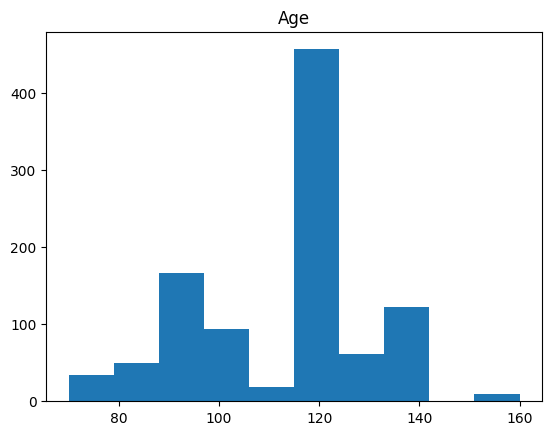

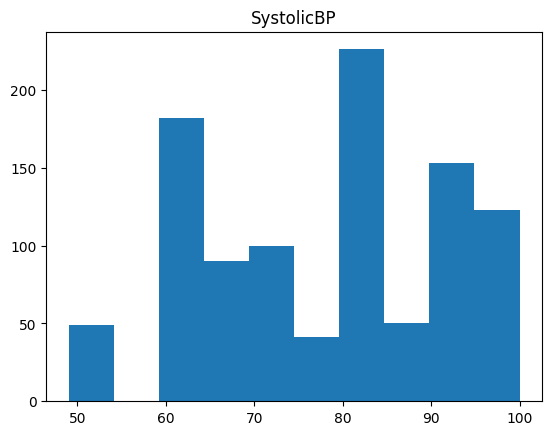

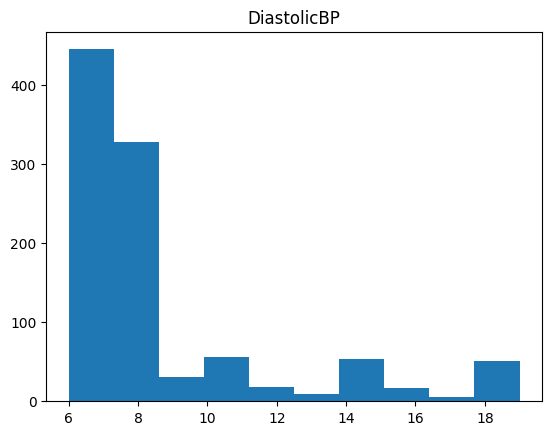

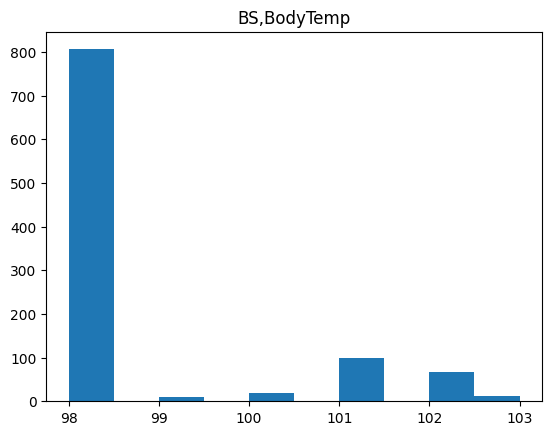

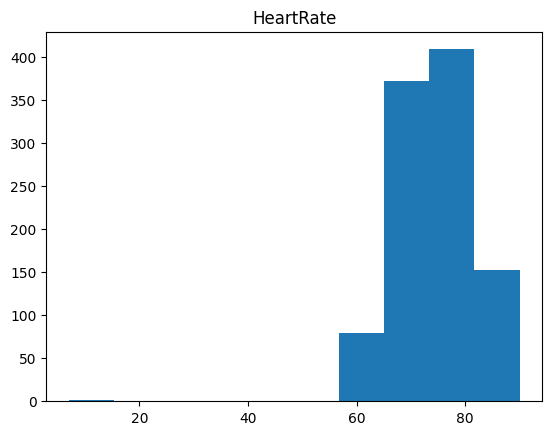

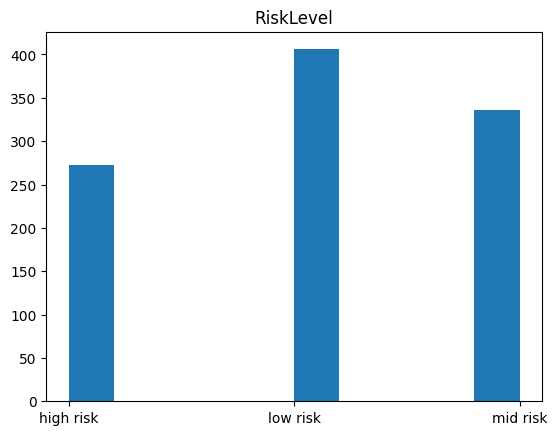

In [ ]:
import seaborn as sns

for i in dataset.columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(dataset[i])

In [ ]:
dataset['RiskLevel'].unique() #to display the unique values of the column

In [ ]:
dataset['RiskLevel'] = dataset['RiskLevel'].replace('low risk', 0).replace('mid risk', 1).replace('high risk', 2) #The classes are checked, now the next step is to turn each value into a number

In [ ]:
y = dataset['RiskLevel'] #what we want to predict
X = dataset.drop(['RiskLevel'], axis=1) #feature training

# **The Scikit-Learn method**

In [ ]:
from sklearn.model_selection import train_test_split #we can use Scikit-Learn's train_test_split() method to further divide them into the train and test sets

SEED = 42 #random number
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED) #we are using 20% of the data for testing and 80% for training.

In [ ]:
from sklearn.ensemble import RandomForestClassifier #import the RandomForestClassifier class and create the model

rfc = RandomForestClassifier(n_estimators=3, #by setting n_estimators parameter as 3 and with each tree having three levels
                             max_depth=2,
                             random_state=SEED) 

In [ ]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

# ***Tree mode view***

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)


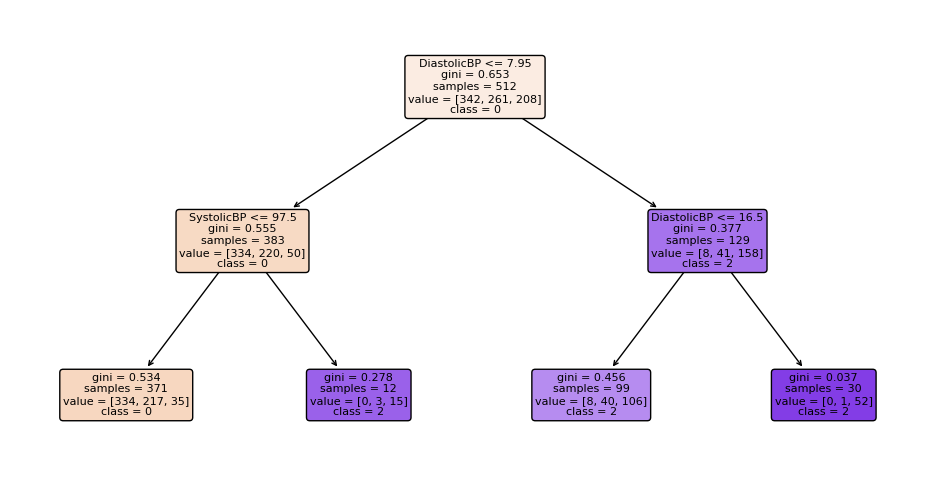

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)


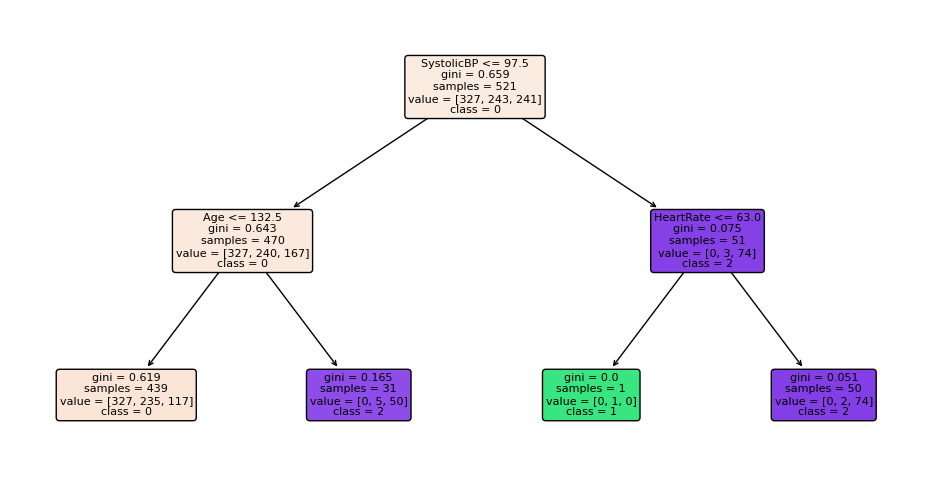

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


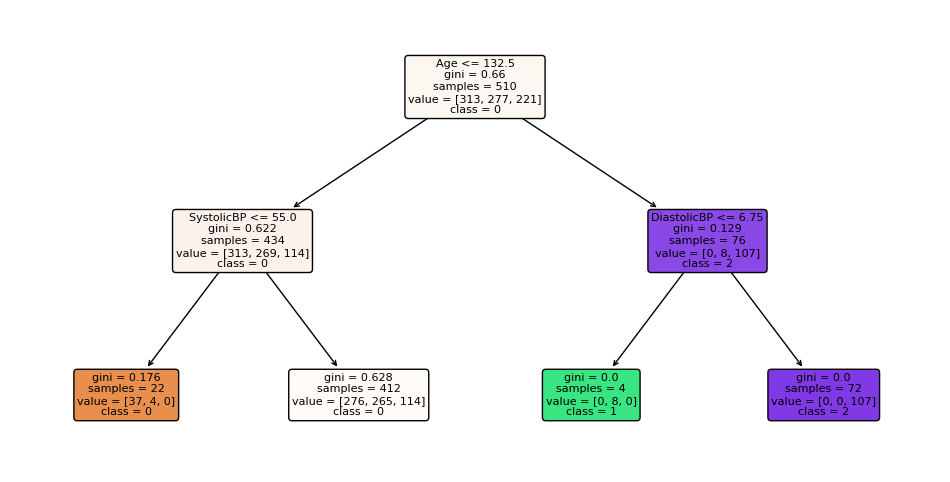

In [ ]:
# Import `tree` module
from sklearn import tree

features = X.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

# ***Confusion Matrix***

              precision    recall  f1-score   support

           0       0.62      0.94      0.75        80
           1       0.82      0.41      0.54        76
           2       0.89      0.85      0.87        47

    accuracy                           0.72       203
   macro avg       0.78      0.73      0.72       203
weighted avg       0.76      0.72      0.70       203



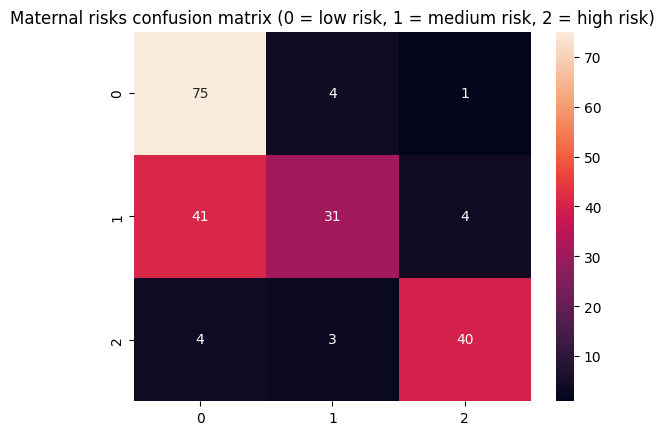

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred))

In [ ]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({ 'importances': rfc.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)
print("Accuracy:" ,features_df_sorted)



Accuracy:    importances
0     0.391483
2     0.335539
1     0.266845
4     0.006133
3     0.000000


In [ ]:
rfc_ = RandomForestClassifier(n_estimators=900, 
                             max_depth=7,
                             random_state=SEED)
rfc_.fit(X_train, y_train)
y_pred = rfc_.predict(X_test)

              precision    recall  f1-score   support

           0       0.62      0.94      0.75        80
           1       0.82      0.41      0.54        76
           2       0.89      0.85      0.87        47

    accuracy                           0.72       203
   macro avg       0.78      0.73      0.72       203
weighted avg       0.76      0.72      0.70       203



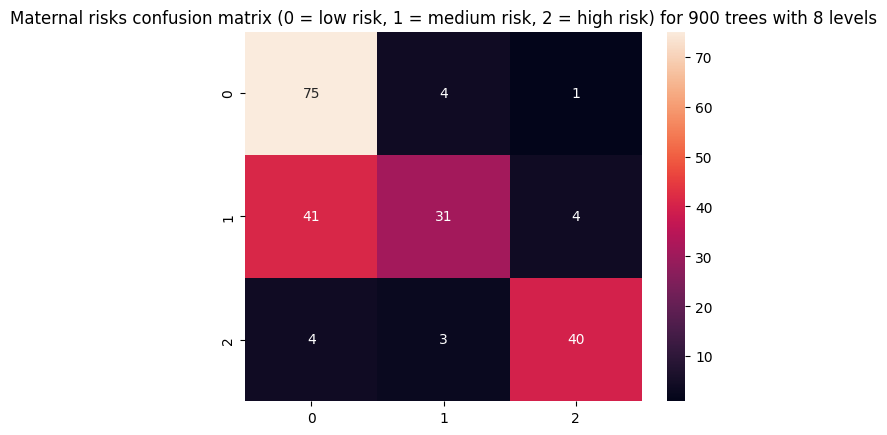

In [ ]:
cm_ = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk) for 900 trees with 8 levels')

print(classification_report(y_test,y_pred))